# Reto Técnico DS

## Pregunta 2

**Objetivo:** Resumir los principales temas que mencionan los comencales al momento de dejar una reseña.
Se propone hacer un mapa de palabras para hacer un análisis de sentimientos.

Primero debemos familiarizarnos con los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from os import path
# En caso de no tener wordcloud instalado, en terminal se instala con pip install wordcloud
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('places_reviews.csv')
df.head()

,url,reviewer,reviewer_avatar,datetime,rating,text,language,id,place_id
0,https://www.google.com/maps/reviews/data=!4m5!...,Josial Iszsa,https://lh3.googleusercontent.com/a-/AOh14GhZ0...,2020-07-30T00:26:00Z,5.0,"Higiene, medidas de sana distancia, excelente ...",es,17546225955757877359-1596057977.804,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
1,https://www.google.com/maps/reviews/data=!4m5!...,Osvaldo Caballero,https://lh4.googleusercontent.com/-5ebzE6LwgJ4...,2020-07-08T00:18:00Z,5.0,Buen lugar para comer y pasar el rato,es,17546225955757877359-1594156694.121,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
2,https://www.google.com/maps/reviews/data=!4m5!...,Marbella Miss,https://lh3.googleusercontent.com/a-/AOh14Gjc-...,2020-03-19T07:53:00Z,5.0,Súper delicioso todo y muy económico 🥰❤️❤️,es,17546225955757877359-1584593609.046,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
3,https://www.google.com/maps/reviews/data=!4m5!...,Erick romero casas,https://lh3.googleusercontent.com/a-/AOh14GjFo...,2020-03-13T00:27:00Z,4.0,"Muy buen servicio, costos un poco elevados",es,17546225955757877359-1584048420.225,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
4,https://www.google.com/maps/reviews/data=!4m5!...,Yoscelina Gomez,https://lh3.googleusercontent.com/a-/AOh14Gig6...,2020-03-08T03:49:00Z,3.0,"Comida rica, buen precio, atención normal, la ...",es,17546225955757877359-1583628551.982,ChIJ_6PxIP_-0YURb-iv-Yq3gPM


In [3]:
df.describe()

,rating
count,9183.000000
mean,4.565937
std,0.873371
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Observamos que hay tres variables que nos pueden ser de interés, las cuales son *datetime*, *rating*, *text* y *language*. Donde nuestro objetivo principal es la variable **text**.

In [4]:
# Primero veamos si el idioma de todas las reseñas es el mismo.
df['language'].unique()

array(['es', 'en', 'it', 'zh-Hant', 'ru', 'sl', 'pt', 'hi', 'pl', 'zh',
       'de', 'fi', 'ja', 'fr', 'tr', 'ro', 'gl', 'ca', 'ar', 'ko', 'sv',
       'id', 'ku', 'cs', nan], dtype=object)

Observamos que no hay un único idioma. Se debe crear un data frame para cada idioma, pero como hay muchos idiomas que desconozco, se hará únicamente para español (es), inglés (en) y alemán (de):

In [5]:
dfes = df.loc[(df['language']=='es')]
dfen = df.loc[(df['language']=='en')]
dfde = df.loc[(df['language']=='de')]

In [6]:
dfes.describe()

,rating
count,8677.000000
mean,4.568053
std,0.867094
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
dfen.describe()

,rating
count,431.000000
mean,4.522042
std,0.983043
min,1.000000
25%,4.500000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
dfde.describe()

,rating
count,2.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [9]:
# Creamos listas de palabras para cada una de los df para tenerlas separadas.
palabras_es=[]
palabras_en=[]
palabras_de=[]

Para poder hacer un análisis  correcto de las palabras necesitamos tomar cada entrada de la columna *text*, separar palabra por palabra y anexarlas a nuestras listas correspondientes, dicho proceso se lleva en los siguientes ciclos. Aprovecharemos para poner todas las palabras en minúsculas.

In [10]:
for i in dfes['text']:
    palabras = i.split()
    for j in palabras:
        palabras_es.append(j.lower())
        
for i in dfen['text']:
    palabras = i.split()
    for j in palabras:
        palabras_en.append(j.lower())
        
for i in dfde['text']:
    palabras = i.split()
    for j in palabras:
        palabras_de.append(j.lower())

Además tenemos que homogenizar nuestaras plabaras, es decir debemos poner tod en minúsculas para no tener diferencias por ello.

En estos momentos tenemos enlistadas todas las palabras que se usaron para hacer las reseñas, pero encontraremos palabras irrelevantes, es decir que no aportan información como "y", "de", etc. Dichas palabras suelen repetirse mucho.
Generaremos los mapas de palabras de cada una de los idiomas para identificar dichas palabras y poder eliminarlas. <br>
Posterior a cada mapa de palabras, crearemos una lista con las palabras que meten ruido, cabe resaltar que ya que todas las reseñas son de restaurantes, la palabra "comida" también sobra.

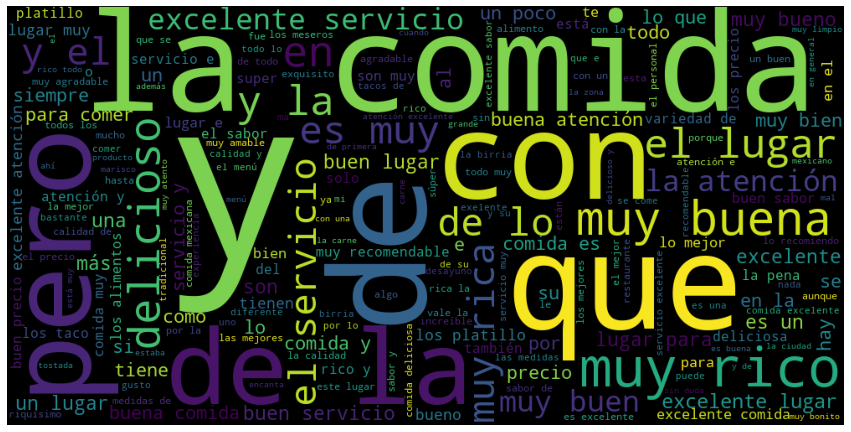

In [11]:
unique_es=(" ").join(palabras_es)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_es)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
ruido_es = ['y', 'con', 'de', 'una', 'la', 'y', 'el', 'con', 'son', 'un', 'que', 'e', 'si', 'comida', 'en', 'lo', 'pero', 
            'e', 'para']

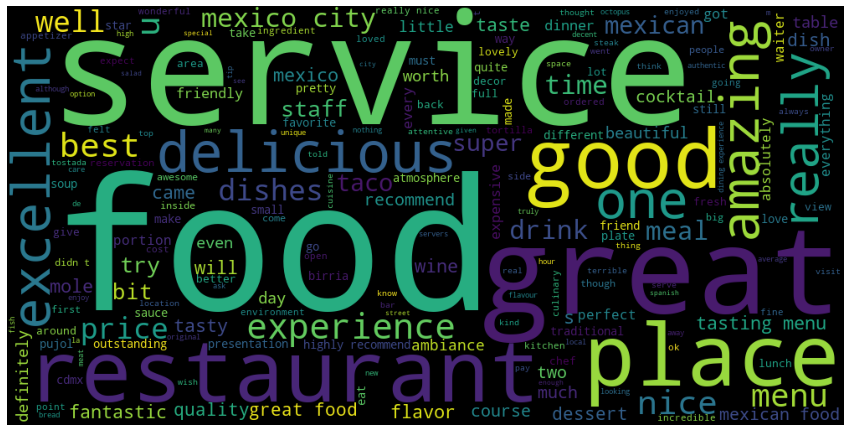

In [13]:
unique_en=(" ").join(palabras_en)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_en)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
ruido_en=['food', 'one']

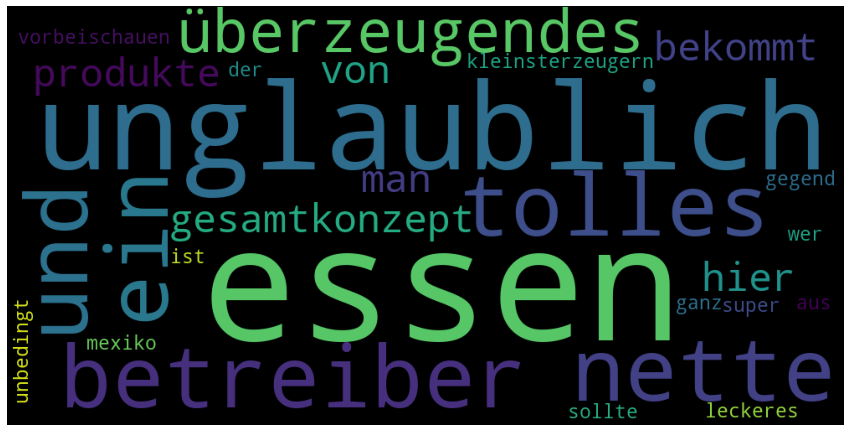

In [15]:
unique_de=(" ").join(palabras_de)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_de)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [16]:
ruido_de=['und', 'aus', 'ein', 'essen', 'ung', 'ist', 'von' 'der']

Pasamos al proceso de limpieza. Aquí generamos un doble ciclo para asegurarnos que no quede ninguna palabra no deseada en nuestras listas finales (al ser un doble ciclo anidado y usar un while, el proceso puede tardar).

In [17]:
for i in ruido_es:
    while i in palabras_es:
        palabras_es.remove(i)
        
        
for i in ruido_en:
    while i in palabras_en:
        palabras_en.remove(i)
        
for i in ruido_de:
    while i in palabras_de:
        palabras_de.remove(i)

Ahora podemos volver a realizar los mapas de palabras ya limpios y guardamos las imágenes.

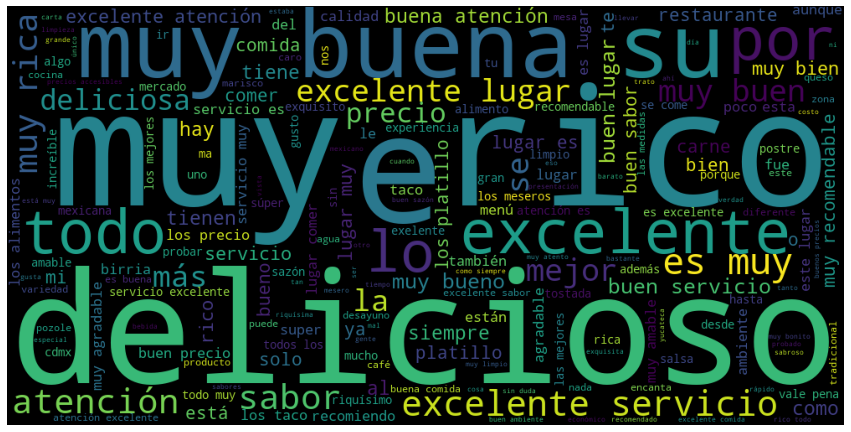

In [18]:
unique_es=(" ").join(palabras_es)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_es)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("reseña_es"+".png", bbox_inches='tight')
plt.show()

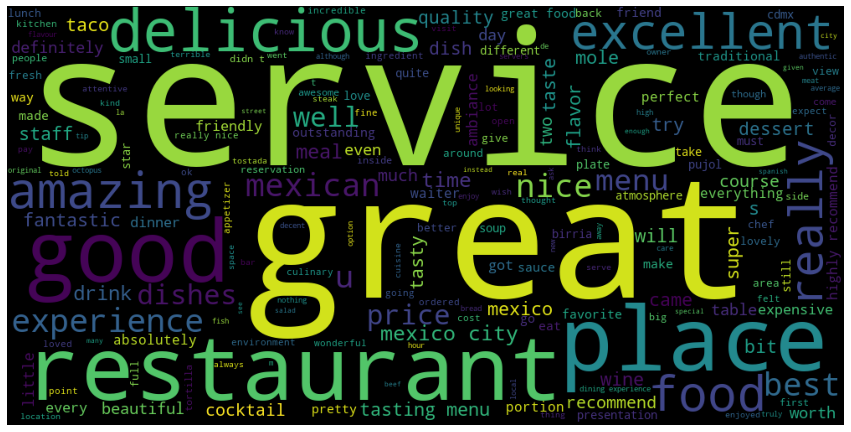

In [19]:
unique_en=(" ").join(palabras_en)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_en)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("reseña_en"+".png", bbox_inches='tight')
plt.show()

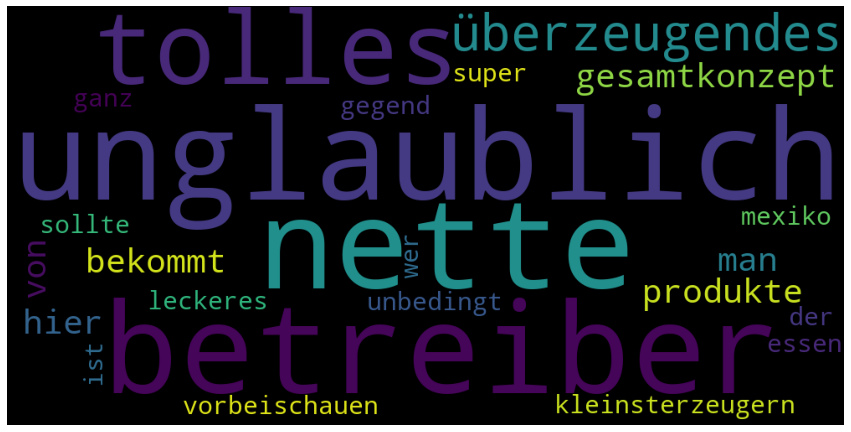

In [20]:
unique_de=(" ").join(palabras_de)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_de)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("reseña_de"+".png", bbox_inches='tight')
plt.show()
plt.close()